In [30]:
#Importing the Keras libraries and packages
import os
import pandas as pd
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [31]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32,
                                  kernel_size=3,
                                  padding="same",
                                  input_shape=(64, 64, 3),
                                  activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64,
                                  kernel_size=3,
                                  padding="same",
                                  activation="relu"))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

# Part Of Neural Network

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [32]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(
    r"/home/aman/Documents/Datasets/HCI-DATASET/Data/train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')
test_set = test_datagen.flow_from_directory(
    r"/home/aman/Documents/Datasets/HCI-DATASET/Data/test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 1225 images belonging to 2 classes.
Found 434 images belonging to 2 classes.


In [33]:
#training 
history = classifier.fit(training_set,
                         steps_per_epoch=10,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=4)

Epoch 1/10
10/10 [==============================] - 2s 181ms/step - loss: 0.8314 - accuracy: 0.5469 - val_loss: 0.7480 - val_accuracy: 0.3438
Epoch 2/10
10/10 [==============================] - 2s 168ms/step - loss: 0.5584 - accuracy: 0.7875 - val_loss: 0.6115 - val_accuracy: 0.6797
Epoch 3/10
10/10 [==============================] - 2s 162ms/step - loss: 0.4584 - accuracy: 0.7875 - val_loss: 0.7091 - val_accuracy: 0.5625
Epoch 4/10
10/10 [==============================] - 2s 158ms/step - loss: 0.3885 - accuracy: 0.8156 - val_loss: 0.8910 - val_accuracy: 0.5469
Epoch 5/10
10/10 [==============================] - 2s 159ms/step - loss: 0.2952 - accuracy: 0.8844 - val_loss: 1.1307 - val_accuracy: 0.5156
Epoch 6/10
10/10 [==============================] - 2s 165ms/step - loss: 0.2591 - accuracy: 0.9000 - val_loss: 1.2527 - val_accuracy: 0.4531
Epoch 7/10
10/10 [==============================] - 2s 157ms/step - loss: 0.2207 - accuracy: 0.9344 - val_loss: 1.5010 - val_accuracy: 0.4062
Epoch 

In [34]:
classifier.save(r'/home/aman/Documents/HCI-JCOMP/demo/PROJECT/model.h5')

1/1 [==============================] - 0s 63ms/step
No - Covid


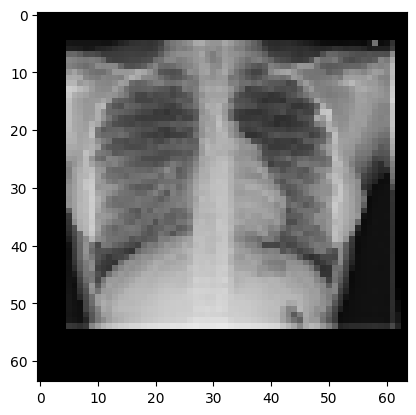

In [35]:
# for only one prediction
import numpy as np

from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

test_image = image.load_img(
    r"/home/aman/Documents/Datasets/covid/COVID-19_Radiography_Dataset/Normal/images/Normal-1.png",
    target_size=(64, 64))

plt.imshow(test_image)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis=0)

result = classifier.predict(test_image)

training_set.class_indices

if result[0][0] == 1:
    prediction = 'No - Covid'
else:
    prediction = 'Covid'
print(prediction)